# MECH 309: Assignment 1

_Cagri Arslan_

January 7, 2025

In [ ]:
# Imports
import numpy as np 
import scipy.integrate
from matplotlib import pyplot as plt

plt.style.use("bmh") # plotting style

## Question 1

### a)

We are given the force distribution $f(x)$ from $x=0$ to $x=l=25\, \mathrm{m}$ as:

\begin{equation}
f(x) = 205\left(\frac{x}{x+7}\right)\exp\!\left(-\frac{2x}{l}\right)\quad\mathrm{[N/m]}
\end{equation}

We plot $f(x)$ with $\Delta x = 1\, \mathrm{m}$ 

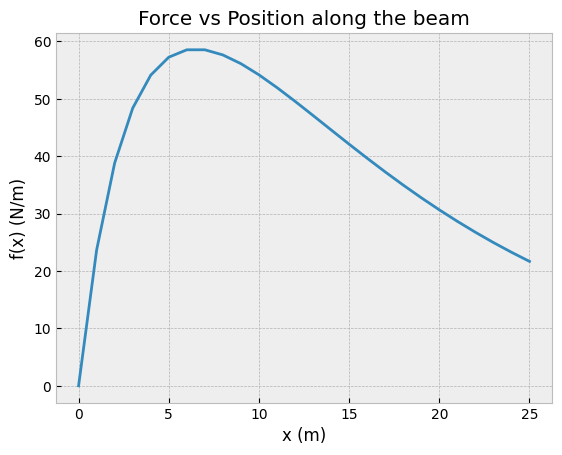

In [132]:
# Set variables
l = 25.0 
x = np.arange(0, l+1, 1.0)

f = 205*(x/(x+7))*np.exp(-2*x/l)

# Plotting
plt.plot(x, f)

plt.xlabel("x (m)")
plt.ylabel("f(x) (N/m)")
plt.title("Force vs Position along the beam") 
plt.show()  

### b)

As $f(x)$ defines the force distribution, we must integrate it to compute the total force $F(x)$. 

\begin{equation}
\end {equaton}

In [124]:
# Function definitions for plots

def f(x: np.ndarray) -> np.ndarray:
    """Evaluate function (1).

    Parameters
    ----------
    x : np.ndarray
        Function input.

    Returns
    -------
    np.ndarray
        Function value.
    """
    y = 1 + x**2 - np.sin(np.pi * x)
    return y


def f_dot_analytical(x: np.ndarray) -> np.ndarray:
    """Evaluate analytical derivative of (1).

    Parameters
    ----------
    x : np.ndarray
        Function input.

    Returns
    -------
    np.ndarray
        Derivative value.
    """
    y_dot = (2 * x) - np.pi * np.cos(np.pi * x)
    return y_dot


def f_dot_finite_difference(x: np.ndarray, delta_x: float) -> np.ndarray:
    """Evaluate forward finite difference approximation of derivative of (1).

    Parameters
    ----------
    x : np.ndarray
        Function input.
    delta_x : float
        Step size.

    Returns
    -------
    np.ndarray
        Derivative value.
    """
    y_dot = (f(x + delta_x) - f(x)) / delta_x
    return y_dot


In [125]:
# Create array of ``x`` values to evaluate
x = np.arange(0, 5, 1e-1)
# Compute derivative of ``f`` using both methods, evaluated at ``x``
f_dot_an_x = f_dot_analytical(x)
f_dot_fd_x = f_dot_finite_difference(x, delta_x=1)

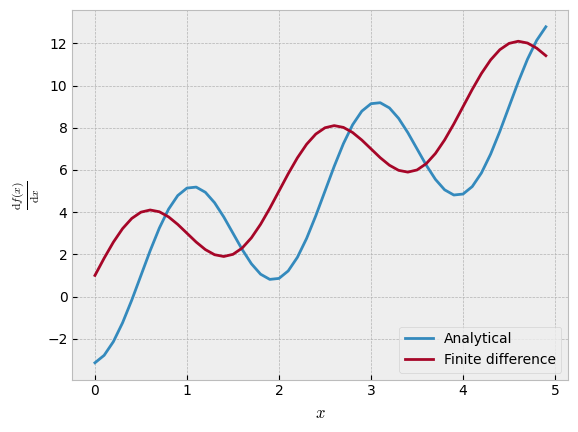

In [126]:
# Plot derivatives for 1b)
fig, ax = plt.subplots()
ax.plot(x, f_dot_an_x, label='Analytical')
ax.plot(x, f_dot_fd_x, label='Finite difference')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\frac{\mathrm{d}f(x)}{\mathrm{d}x}$')
ax.grid(linestyle='--')
ax.legend(loc='lower right')

### c)

A plot of $f(x)$ for $x \in [0, 5]$ is found below.

In [127]:
# Evaluate ``f(x)`` using ``x`` defined above.
f_x = f(x)

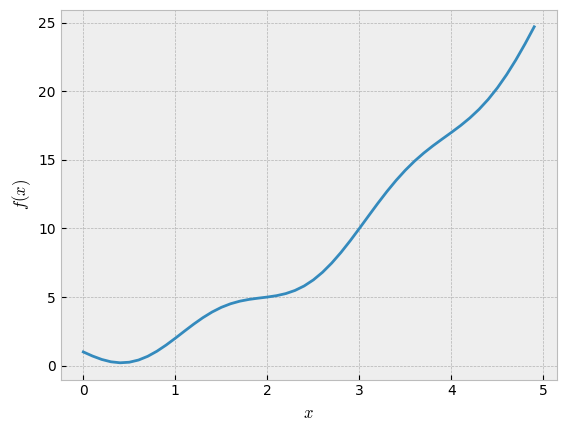

In [128]:
# Plot function for 1c)
fig, ax = plt.subplots()
ax.plot(x, f_x)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.grid(linestyle='--')

The figure above shows that $\Delta x = 1$ is not an
appropriate step size for $f(x)$, as it is too large. The
derivative near zero should be negative, but since the step
size is too large, it is incorrectly approximated as positive.
In this case, a good rule of thumb would be to pick $\Delta x$
to be significantly smaller than the period of $\sin(\pi x)$.


## Question 2

### a)

The eigenvalues of $\mathbf{A}$ are
\begin{align}
    \lambda_0
    &=
    -0.25 +j 0.19364917,
    \\
    \lambda_1
    &=
    -0.25 -j 0.19364917,
\end{align}
as computed with `scipy.linalg.eigvals()`. They are plotted below.


In [129]:
# Compute eigenvalues
A = np.array([
    [0, 1],
    [-0.1, -0.5],
])
eigv = scipy.linalg.eigvals(A)
print(eigv)

[-0.25+0.19364917j -0.25-0.19364917j]


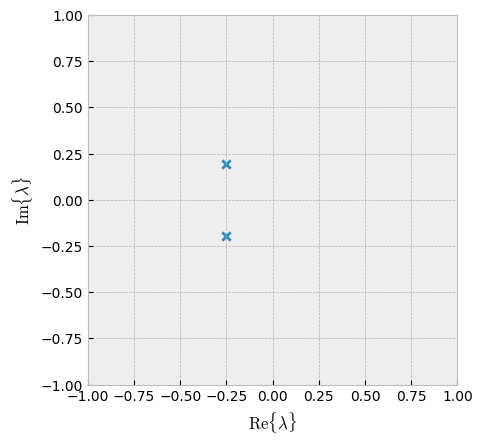

In [130]:
# Plot eigenvalues
fig, ax = plt.subplots()
ax.scatter(np.real(eigv), np.imag(eigv), marker='x')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # Force axis aspect ratio to be equal
ax.set_xlabel(r'$\mathrm{Re}\{\lambda\}$')
ax.set_ylabel(r'$\mathrm{Im}\{\lambda\}$')
ax.grid(linestyle='--')

### b)

The ODE is asymptotically stable because its eigenvalues are in the open left half-plane. In other words, their real parts are strictly negative.

### c)

The numerically integrated trajectory for $\mathbf{x}_0 = \begin{bmatrix}1 & 1 \end{bmatrix}^\mathsf{T}$ 

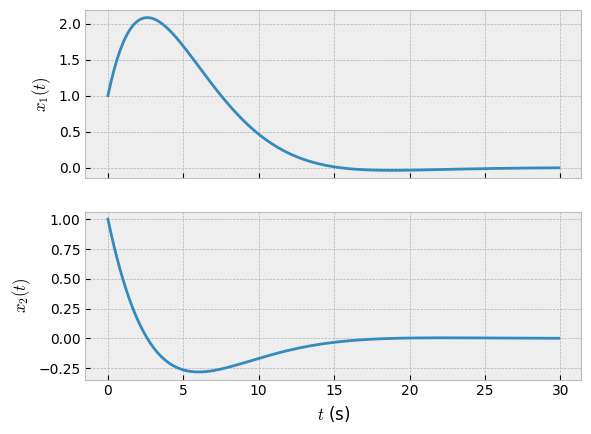

In [131]:
def ivp(t, x):
    """Evaluate ``x_dot`` in (2)."""
    x_dot = A @ x.reshape((-1, 1))
    return x_dot.ravel()

# Solve initial value problem defined in ``ivp``
t_span = (0, 30)
t_step = 1e-1
t = np.arange(*t_span, t_step)
x0 = np.array([1, 1])
sol = scipy.integrate.solve_ivp(
    ivp,
    t_span=t_span,
    y0=x0,
    method='RK45',
    t_eval=t,
)

# Plot trajectory
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, sol.y[0, :])
ax[1].plot(t, sol.y[1, :])
ax[1].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$x_1(t)$')
ax[1].set_ylabel(r'$x_2(t)$')
ax[0].grid(linestyle='--')
ax[1].grid(linestyle='--')